# SIT742: Modern Data Science 
**(2020 Assessment Task 01: Exploration for Data Scientists Survey Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Shubhneet Gulati
- Student ID:  218672363
- Email:  gulatish@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---

## Overview

In 2017, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) conducted a survey on a large range of users registered as the data scientist in their platform. The survey data are broadly covered the skill set of the data scientists, the demographic of the data scientists, the feedback of the platform and many other information. 

In this task, you will need to 

- **Part 1**: Given the following two data sets, you are required to finish some required analysis, with the exploreation data analytics skills as well as visuilization skills
     - [MCQResponses.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv): Participants' answers to multiple choice questions. Each column contains the answers of one respondent to a specific question.     
     - [ConversionRates.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv): Currency conversion rates to USD. 
- **Part 2**: Given the following data set, you are required to find out top keywords for hiring the data scientists. 
    - [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv): Data scientists job advertising in US with job descriptions, from JobPikr.


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## Part 1 - What we could know about the Data Scientists? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***


In [1]:
!pip install wget
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import wget
import seaborn as sns 
sns.set(style="whitegrid")
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output

In [3]:
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/MCQResponses.csv'
DataSet = wget.download(link_to_data)

 78% [.........................................................                 ]  794624 / 1018741

100% [..........................................................................] 1018741 / 1018741

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load MCQResponses.csv into dataframe df_demog, and check the data statistics and general information by printing its top 5 rows.
</div>

In [4]:
# MCQResponses.csv is loaded into df_demog using pandas dataframe read csv operator.
df_demog =  pd.read_csv(link_to_data,delimiter=',')

# Printing top 5 rows of df_demog using head operator.
df_demog.head(5)

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5


<div class="alert alert-block alert-info">

**Code**: 
    Check which columns have NAs (don't remove them now), and for each of those columns, display how many records with values (namely, no NULL values)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.A** Please include your result for this coding task into your report, with proper section title '1.0.A'.
</div>
    </div>




In [5]:
# isna() and any() function is use to check if any of the columns value have NAs.
# tolist() function is used to list down all those columns.

print('MCQResponses Columns that have NA values : - ')
df_demog.columns[df_demog.isna().any()].tolist() 


MCQResponses Columns that have NA values : - 


['TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'MajorSelect',
 'FirstTrainingSelect',
 'JobSatisfaction']

In [6]:
# notna() function is use to check the columns that have no null values
# sum() function is use to sum all those records of each columns that have not null values

print('MCQResponses columns (that have NAs) records with no NULL values : - ')
df_demog.filter(['TitleFit','CurrentEmployerType','MLToolNextYearSelect','MLMethodNextYearSelect','LanguageRecommendationSelect',
                'MajorSelect','FirstTrainingSelect','JobSatisfaction']).notna().sum()


MCQResponses columns (that have NAs) records with no NULL values : - 


TitleFit                        4251
CurrentEmployerType             4275
MLToolNextYearSelect            4206
MLMethodNextYearSelect          4170
LanguageRecommendationSelect    4228
MajorSelect                     3952
FirstTrainingSelect             4324
JobSatisfaction                 4317
dtype: int64

<div class="alert alert-block alert-info">

**Code**: 
    Select the users whose current job title is 'Data Scientist', and store into variable df_demog_ds    

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.0.B** Please include your result of `how many Data Scientists?' into your report, with proper section title  '1.0.B'.
</div>
</div>




In [7]:
# Fetch the CurrentJobTitleSelect column from df_demog that have 'Data Scientist' records and store it in df_demog_ds   

df_demog_ds=df_demog[df_demog['CurrentJobTitleSelect']=='Data Scientist']
df_demog_ds

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
9,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9
10,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8
12,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7
15,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,Male,Iran,27,Employed full-time,Yes,Data Scientist,Perfectly,Employed by professional services/consulting firm,NaN,NaN,NaN,Doctoral degree,Mathematics or statistics,Other,400000000.0,IRR,NaN
4315,Male,United States,32,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Engineering (non-computer focused),University courses,170000.0,USD,7
4321,Male,France,38,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,Python,Text Mining,R,Master's degree,NaN,"Online courses (coursera, udemy, edx, etc.)",55000.0,EUR,5
4324,Male,United States,50,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Computer Science,University courses,200000.0,USD,7


In [8]:
print('Total Number of Data Scientists who responded to the survey    :', len(df_demog_ds))

Total Number of Data Scientists who responded to the survey    : 1263


### 1.1. Education
<a id="education"></a>
***
In data scientists job, education is important. Is it reasonable to ask data scientists to have a Master's or Doctoral degree? Let's find out. 


<div class="alert alert-block alert-info">

**Code**: 
    Plot and display as text output the number and percentage of data scientist with each type of formal education. 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1** Please include your running result of this coding task into your report, with proper section title  '1.1'.
</div>
</div>

In [9]:
# value_counts() function is use to get a Series containing counts of unique values. It excludes NA values by default.
# mul(100), round(1) function is use to convert the number into percentage format

df_demog_ds_number=df_demog_ds['FormalEducation'].value_counts()
df_demog_ds_percentage=df_demog_ds['FormalEducation'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
df_demog_ds_plt=pd.DataFrame({'Total Number of Data Scientist': df_demog_ds_number, 
                              'Percentage of Data Scientist': df_demog_ds_percentage})
df_demog_ds_plt

,Total Number of Data Scientist,Percentage of Data Scientist
Master's degree,635,50.3%
Doctoral degree,326,25.8%
Bachelor's degree,252,20.0%
Professional degree,25,2.0%
Some college/university study without earning a bachelor's degree,19,1.5%
I did not complete any formal education past high school,6,0.5%


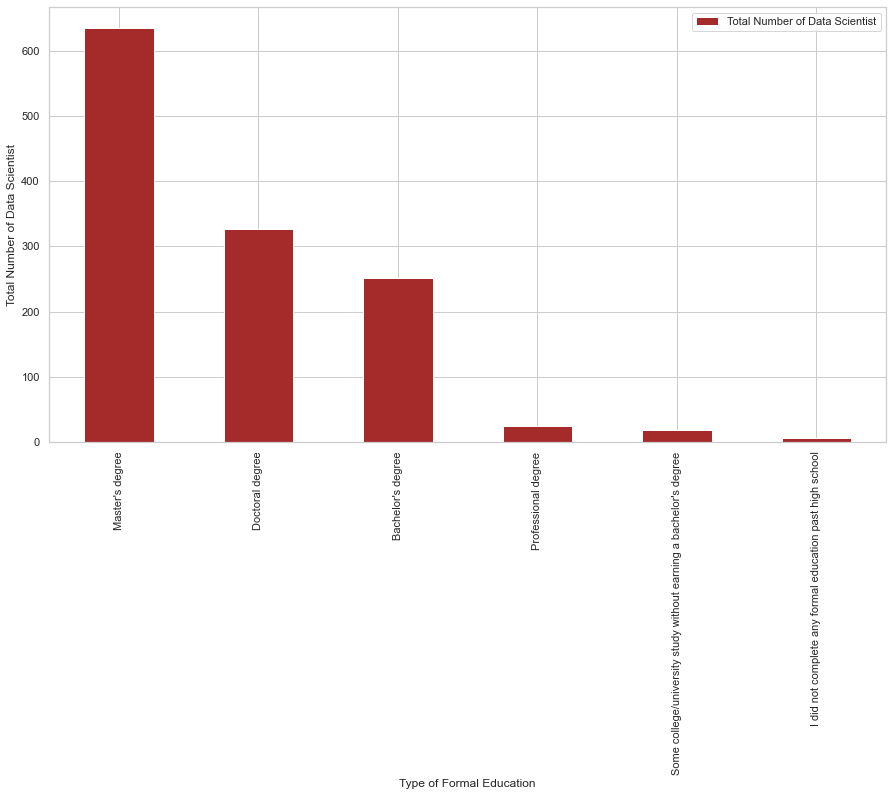

In [10]:
# Plotting the Total Number of Data Scientist

df_demog_ds_plt.plot(kind='bar',color=('brown'))    # Plotting bar graph for the table
fig=plt.gcf()                                      # Allows us to get  reference of the current figure
fig.set_size_inches(15, 8)                         # Setting the size of bar chart figure
plt.xticks(rotation=90)                            # Rotating the X axis column values by 90 degrees
plt.xlabel('Type of Formal Education')             # Setting up the xaxis title of bar graph
plt.ylabel('Total Number of Data Scientist')       # Setting up the yaxis title of bar graph
plt.show()

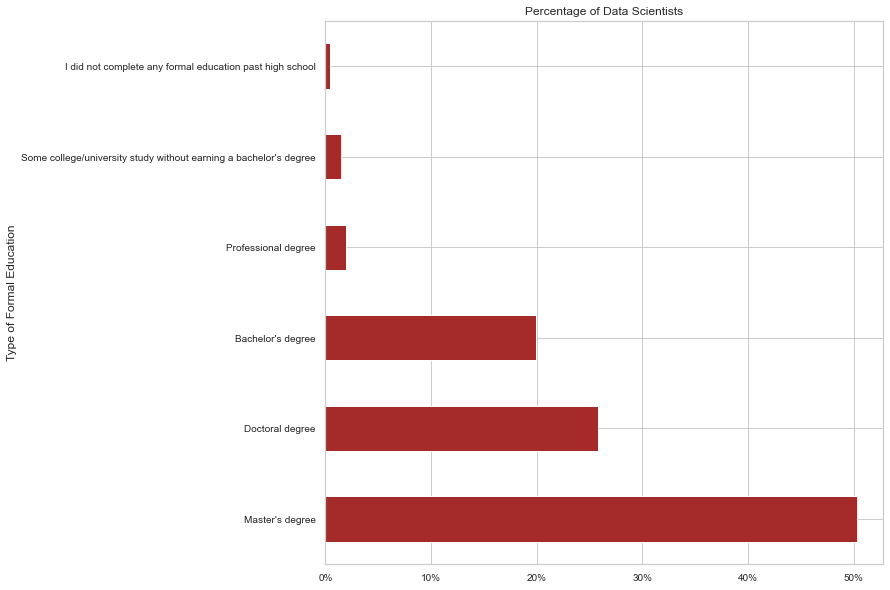

In [11]:
# Plotting the Percentage of Data Scientist
import matplotlib.ticker as mtick
ax=df_demog_ds['FormalEducation'].value_counts(normalize=True).mul(100).plot(kind='barh',align='center',
                                                                             figsize=(10,10),color='brown',fontsize=10)
ax.set_title("Percentage of Data Scientists")
ax.set_ylabel('Type of Formal Education')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())  

### 1.2. Salary
<a id="salary"></a>

Data science is considered a very well paying role, let's find out the salary information. Since all of the respondents did not come from one country, we can assume that they gave their salaries in their countries currency. We have filtered the data for you and provided exchange rates in a file called *ConversionRates.csv* which should already be imported. 

First of all, you need to merge the multiple choice data with the *ConversionRates.csv* by using the compensation currency and originCountry respectively. And then you will need to multiply the compensation amount with exchangeRateAUS to have the Australian dollors.

In [12]:
# Loading data from ConversionRates.csv and saving it to df_demog_2 dataframe

link_to_data_2 = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/ConversionRates.csv'
DataSet = wget.download(link_to_data_2)
link_to_data_2
df_demog_2 =  pd.read_csv(link_to_data_2,delimiter=',')
df_demog_2.drop('Unnamed: 0',axis=1,inplace=True)
df_demog_2

100% [................................................................................] 1877 / 1877

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


In [13]:
df_demog_ds

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7
9,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9
10,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8
12,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7
15,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,Male,Iran,27,Employed full-time,Yes,Data Scientist,Perfectly,Employed by professional services/consulting firm,NaN,NaN,NaN,Doctoral degree,Mathematics or statistics,Other,400000000.0,IRR,NaN
4315,Male,United States,32,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Engineering (non-computer focused),University courses,170000.0,USD,7
4321,Male,France,38,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,Python,Text Mining,R,Master's degree,NaN,"Online courses (coursera, udemy, edx, etc.)",55000.0,EUR,5
4324,Male,United States,50,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Computer Science,University courses,200000.0,USD,7


In [14]:
# Merging MCQResponses Data Scientists data with ConversionRates.csv by using the compensation currency and originCountry resp.
# Joining both dataframes by applying left outer join to show all records of MCQResponses Data Scientists.

df_demog_merge=pd.merge(left=df_demog_ds,right=df_demog_2,left_on='CompensationCurrency',right_on='originCountry',how='left')
df_demog_merge.drop(['originCountry'],axis=1,inplace=True)
df_demog_merge

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,exchangeRate
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,0.015620
1,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9,0.000342
2,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8,1.195826
3,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7,1.324188
4,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7,1.195826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,Male,Iran,27,Employed full-time,Yes,Data Scientist,Perfectly,Employed by professional services/consulting firm,NaN,NaN,NaN,Doctoral degree,Mathematics or statistics,Other,400000000.0,IRR,NaN,0.000030
1259,Male,United States,32,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Engineering (non-computer focused),University courses,170000.0,USD,7,1.000000
1260,Male,France,38,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,Python,Text Mining,R,Master's degree,NaN,"Online courses (coursera, udemy, edx, etc.)",55000.0,EUR,5,1.195826
1261,Male,United States,50,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Computer Science,University courses,200000.0,USD,7,1.000000


In [15]:
# To have the salary in Australian dollors in new column 'CompensationAmountInAUD' is created.
# apply() function is used with lambda operation to multiply the CompensationAmount with exchangeRate 

df_demog_merge['CompensationAmountInAUD']=df_demog_merge.apply(lambda row: row.CompensationAmount * row.exchangeRate, axis=1)
df_demog_merge

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,exchangeRate,CompensationAmountInAUD
0,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,0.015620,1483.90
1,Male,Colombia,34,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that doesn't perform adv...,Spark / MLlib,"Ensemble Methods (e.g. boosting, bagging)",Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",156000000.0,COP,9,0.000342,53352.00
2,Male,Germany,41,"Independent contractor, freelancer, or self-em...",Yes,Data Scientist,Fine,Self-employed,I don't plan on learning a new tool/technology,Factor Analysis,Python,I did not complete any formal education past h...,NaN,Work,150000.0,EUR,8,1.195826,179373.90
3,Male,United Kingdom,36,Employed full-time,Yes,Data Scientist,Poorly,Employed by a company that performs advanced a...,Microsoft Azure Machine Learning,Proprietary Algorithms,Python,Doctoral degree,Electrical Engineering,University courses,130000.0,GBP,7,1.324188,172144.44
4,Male,Portugal,30,Employed full-time,Yes,Data Scientist,Fine,Employed by a company that performs advanced a...,TensorFlow,Monte Carlo Methods,Python,Master's degree,Physics,Kaggle competitions,30000.0,EUR,7,1.195826,35874.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,Male,Iran,27,Employed full-time,Yes,Data Scientist,Perfectly,Employed by professional services/consulting firm,NaN,NaN,NaN,Doctoral degree,Mathematics or statistics,Other,400000000.0,IRR,NaN,0.000030,12000.00
1259,Male,United States,32,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Engineering (non-computer focused),University courses,170000.0,USD,7,1.000000,170000.00
1260,Male,France,38,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,Python,Text Mining,R,Master's degree,NaN,"Online courses (coursera, udemy, edx, etc.)",55000.0,EUR,5,1.195826,65770.43
1261,Male,United States,50,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Computer Science,University courses,200000.0,USD,7,1.000000,200000.00


<div class="alert alert-block alert-info">

**Code**: 
Use the codes for each country to merge the files so that you can convert the salary data to Australian Dollars (AUD). Print out the maximum and median salary in AUD. Hint: think about what data type you have.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.A** In your report's section '1.2.A', answer what is the maximum and the median salary in AUD (this is for all respondents). 
</div>
</div>


In [16]:
# A new dataframe 'df_demog_merge_resp' is created to store the all respondents data along with thier salaries in AUD.

df_demog_merge_resp=pd.merge(left=df_demog,right=df_demog_2,left_on='CompensationCurrency',
                                right_on='originCountry',how='left')
df_demog_merge_resp.drop(['originCountry'],axis=1,inplace=True)
df_demog_merge_resp['CompensationAmountInAUD']=df_demog_merge_resp.apply(lambda row: row.CompensationAmount * row.exchangeRate, 
                                                                               axis=1)
df_demog_merge_resp

,GenderSelect,Country,Age,EmploymentStatus,CodeWriter,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect,FirstTrainingSelect,CompensationAmount,CompensationCurrency,JobSatisfaction,exchangeRate,CompensationAmountInAUD
0,Male,United States,56,"Independent contractor, freelancer, or self-em...",Yes,Operations Research Practitioner,Poorly,Self-employed,TensorFlow,Neural Nets,Python,Master's degree,Mathematics or statistics,University courses,250000.0,USD,10 - Highly Satisfied,1.000000,250000.000
1,Female,Australia,43,Employed full-time,Yes,Business Analyst,Fine,Employed by non-profit or NGO,Microsoft Excel Data Mining,Link Analysis,Python,Bachelor's degree,NaN,Work,80000.0,AUD,7,0.802310,64184.800
2,Male,Russia,33,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,C/C++,Deep learning,Python,Bachelor's degree,Other,Self-taught,1200000.0,RUB,7,0.017402,20882.400
3,Male,India,27,Employed full-time,Yes,Data Scientist,Fine,Employed by professional services/consulting f...,Other,Deep learning,Python,Bachelor's degree,Electrical Engineering,University courses,95000.0,INR,7,0.015620,1483.900
4,Male,Taiwan,26,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,TensorFlow,Deep learning,Python,Master's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",1100000.0,TWD,5,0.033304,36634.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,Male,Other,56,Employed full-time,Yes,DBA/Database Engineer,Poorly,Employed by professional services/consulting firm,IBM Watson / Waton Analytics,Anomaly Detection,R,Bachelor's degree,Mathematics or statistics,"Online courses (coursera, udemy, edx, etc.)",50000.0,USD,4,1.000000,50000.000
4323,Male,Germany,34,Employed full-time,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,Other,Deep learning,Python,Bachelor's degree,Computer Science,"Online courses (coursera, udemy, edx, etc.)",84000.0,EUR,6,1.195826,100449.384
4324,Male,United States,50,Employed full-time,Yes,Data Scientist,Perfectly,Employed by a company that performs advanced a...,NaN,NaN,NaN,Doctoral degree,Computer Science,University courses,200000.0,USD,7,1.000000,200000.000
4325,Male,Norway,32,Employed full-time,Yes,Data Analyst,Perfectly,Employed by a company that performs advanced a...,TensorFlow,Deep learning,R,Master's degree,Mathematics or statistics,"Online courses (coursera, udemy, edx, etc.)",75000.0,EUR,8,1.195826,89686.950


In [17]:
# max() and median() function is used to calculate maximum and median of new generated salary column.

max_salary=df_demog_merge_resp['CompensationAmountInAUD'].max()
median_salary=df_demog_merge_resp['CompensationAmountInAUD'].median()

print("Maximum salary in AUD for all respondents  is     :    ",max_salary,"AUD")
print("Median salary in AUD for all respondents  is      :    ",median_salary,"AUD")


Maximum salary in AUD for all respondents  is     :     9999999.0 AUD
Median salary in AUD for all respondents  is      :     53944.100000000006 AUD


<div class="alert alert-block alert-info">

**Code**: 
Plot a boxplot of the Australian respondents salary distribution. Print out the maximum and median salaries for Australian repsondnts.
   
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.B** In your report's section '1.2.B', answer what is the maximum and median salary in AUD for Australian respondents, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


Maximum salary in AUD for Australian Respondents      :     400000.0    AUD
Median of salary in AUD for Australian Respondents    :     93469.115    AUD


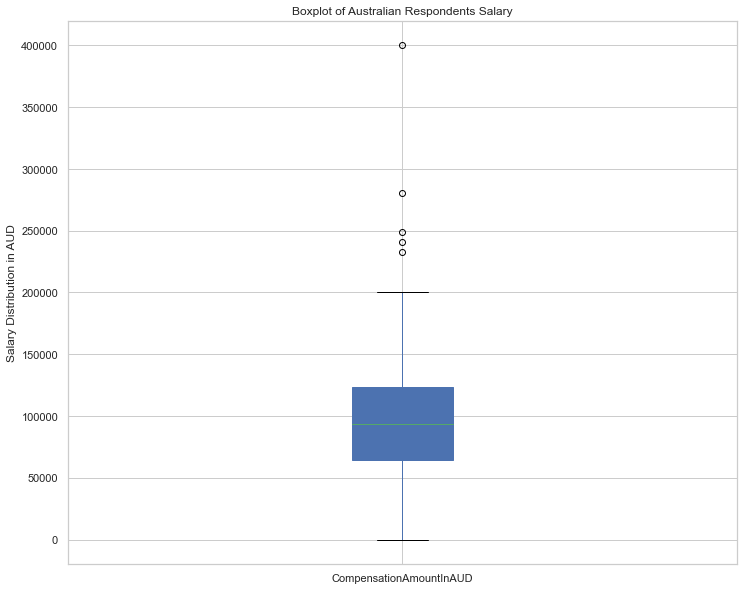

In [18]:
# First, respondents records from country Australia is filtered out and stored into df_demog_au_respondents
# Second, max() and median() function is used to calculate maximum and median of new generated salary column 

df_demog_au_respondents=df_demog_merge_resp[df_demog_merge_resp['Country']=='Australia']
max_salary_au_respondents=df_demog_au_respondents['CompensationAmountInAUD'].max()
median_salary_au_respondents=df_demog_au_respondents['CompensationAmountInAUD'].median()
print("Maximum salary in AUD for Australian Respondents      :    ",max_salary_au_respondents,"   AUD")
print("Median of salary in AUD for Australian Respondents    :    ",median_salary_au_respondents,"   AUD")

# Then, boxplot() function is used to plot a boxplot of salary distribution of Australian respondents
plt.title("Boxplot of Australian Respondents Salary")
df_demog_au_respondents.boxplot(figsize=(40,40),column='CompensationAmountInAUD',patch_artist=True)
fig = plt.gcf()                                    # Allows us to get reference of the current figure
fig.set_size_inches(12, 10)                        # Setting the size of boxplot figure
plt.ylabel('Salary Distribution in AUD')           # Setting up the yaxis title of bar graph
plt.show()

<div class="alert alert-block alert-info">

**Code**: 
There are some outliers in the Australian salary plot. You are required to filter the salary of Australian respondents by removing any below 40,000 or above 250,000. 

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.2.C** In your report's section '1.2.C', answer what is the new maximum and median salary in AUD for Australian respondents after filtering, and also include your plotted boxplot of this coding task into your report. 
</div>
</div>


In [19]:
# Outliers are removed from salary of Australian respondents by removing any below 40,000 or above 250,000 
# max() and median() function is used to calculate maximum and median of CompensationAmountInAUD salary column

df_demog_au_respondents_rmvoutliers=df_demog_au_respondents[(df_demog_au_respondents['CompensationAmountInAUD'] > 40000) 
                                                            & (df_demog_au_respondents['CompensationAmountInAUD'] < 250000)]
max_salary_au_respondents_rmvoutliers=df_demog_au_respondents_rmvoutliers['CompensationAmountInAUD'].max()
median_salary_au_respondents_rmvoutliers=df_demog_au_respondents_rmvoutliers['CompensationAmountInAUD'].median()
print("Maximum salary for all Australian respondents after removing outliers     :    ",
      max_salary_au_respondents_rmvoutliers,"AUD")
print("Median of salary for all Australian respondents after removing outliers   :    ",
      median_salary_au_respondents_rmvoutliers,"AUD")


Maximum salary for all Australian respondents after removing outliers     :     248716.10000000003 AUD
Median of salary for all Australian respondents after removing outliers   :     96277.20000000001 AUD


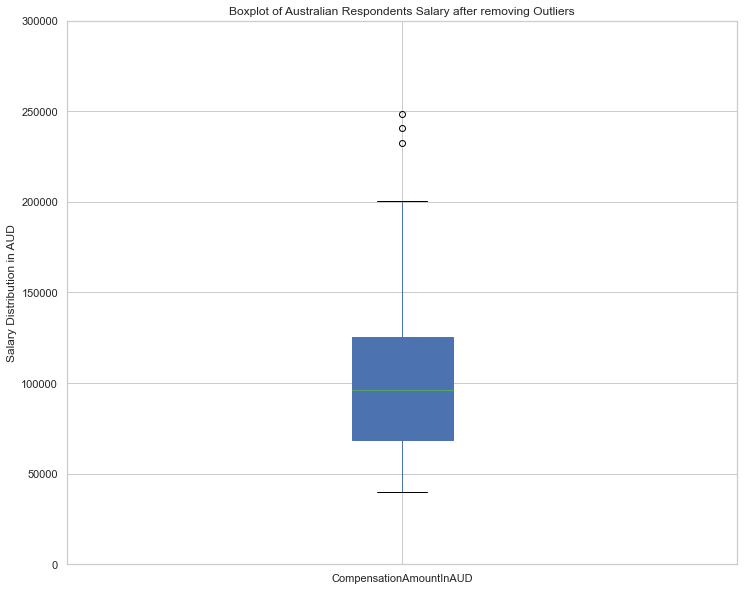

In [20]:
plt.title("Boxplot of Australian Respondents Salary after removing Outliers")

df_demog_au_respondents_rmvoutliers.boxplot(figsize=(40,40),column='CompensationAmountInAUD',patch_artist=True)
fig = plt.gcf()                                       # Allows us to get reference of the current figure
fig.set_size_inches(12, 10)                           # To set size of figure
plt.ylim(0, 300000)                                   # To set yaxis limit
plt.ylabel('Salary Distribution in AUD')
plt.show()

### 1.3. Exploring the data scientist Demographics
<a id="demographics"></a>
***

#### 1.3.1 Age
<a id="age"></a>
You will need to build a boxplot to explore the age of all data scientists. 
Your plot must have a label for each axis, a tittle and also show the outliers.

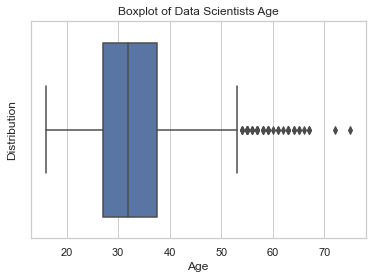

In [21]:
# Seaborn library is used to plot boxplot for age of all data scientists
plt.title("Boxplot of Data Scientists Age")

ax = sns.boxplot(x=df_demog_ds["Age"])
ax.set_xlabel('Age')          # to set x label of boxplot
ax.set_ylabel('Distribution') # to set y label of boxplot
plt.show()

<div class="alert alert-block alert-info">

**Code**: 
        <ol>
        <li> Calculate the five number summary descriptive statistics for age as shown on the boxplot, as well as the mean. Please round your mean to integer.</li>
        <li> Regardless of the errors that the data show, we are interested in working-age data scientists, how many aged between 24 and 60. </li>
        <li> How many respondents were under 18?</li>
    </ol>
    

    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.A** In your report's section '1.3.A', answer 
        <ol>
        <li> What is the mean age of all data scientists? </li>
        <li> What is the median age of all data scientists? </li>
        <li> how many data scientists aged between 24 and 60</li>
        <li> how many respondents were under 18? </li>
    </ol>
</div>
</div>







In [22]:
print("Mean age of all Data Scientists                   : ",df_demog_ds['Age'].mean().round(0)) # round(0) rounds it to integer
print("Median of age for all Data Scientists             : ",df_demog_ds['Age'].median())
print("Number of Data Scientists aged between 24 and 60  : ",len(df_demog_ds[(df_demog_ds['Age']>=24) & (df_demog_ds['Age']<=60)]))
print("Number of Data Scientists aged under 18           : ",len(df_demog_ds[(df_demog_ds['Age']<18)]))
print("Number of Australia Respondents aged under 18     : ",len(df_demog_au_respondents[(df_demog_au_respondents['Age']<18)]))

# quantile() function is used to calculate the quartile for 'Age' column in df_demog_ds

print("Maximum age among all Data Scientists             : ",df_demog_ds['Age'].max())
print("Minimum age among all Data Scientists             : ",df_demog_ds['Age'].min())
print("Range of age for all Data Scientists              : ",df_demog_ds['Age'].max()-df_demog_ds['Age'].min())
print("First quartile of age for all Data Scientists     : ",df_demog_ds['Age'].quantile(0.25))
print("Thrid quartile of age for all Data Scientists     : ",df_demog_ds['Age'].quantile(0.75))
print("Interquartile range of age for all Data Scientists: ",df_demog_ds['Age'].quantile(0.75)-df_demog_ds['Age'].quantile(0.25))


Mean age of all Data Scientists                   :  34.0
Median of age for all Data Scientists             :  32.0
Number of Data Scientists aged between 24 and 60  :  1188
Number of Data Scientists aged under 18           :  1
Number of Australia Respondents aged under 18     :  1
Maximum age among all Data Scientists             :  75
Minimum age among all Data Scientists             :  16
Range of age for all Data Scientists              :  59
First quartile of age for all Data Scientists     :  27.0
Thrid quartile of age for all Data Scientists     :  37.5
Interquartile range of age for all Data Scientists:  10.5


#### 1.3.2 Gender
<a id="gender"></a>
We are interested in the gender of respondents. Nowadays, the gender equity is important for companies and organizations. 


<div class="alert alert-block alert-info">

**Code**: 
Plot the gender distribution of the data scientist users using a bar chart. 
</div>


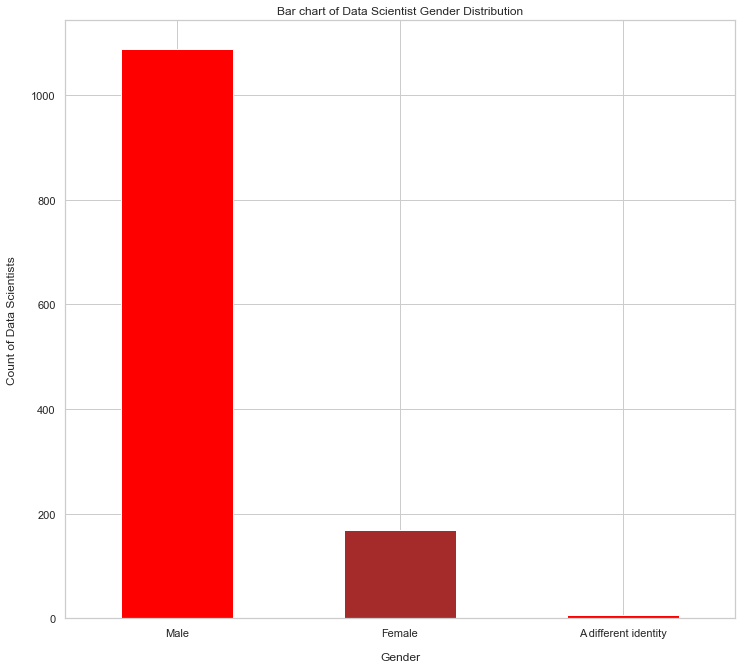

In [23]:
plt.title("Bar chart of Data Scientist Gender Distribution")

sns.set(font_scale=1.4)
df_demog_ds['GenderSelect'].value_counts().plot(kind='bar',figsize=(12,11),rot=0,align='center',color=('red','brown'))
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of Data Scientists", labelpad=14)
plt.show()


Now let's see if any relationship between gender and age

Create a box plot showing the age of all the data scientists according to gender (men, women and other identity).

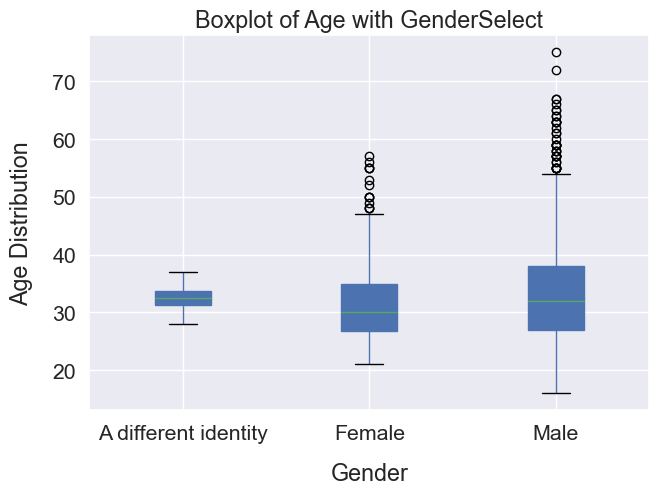

In [24]:
# 'by' is used within boxplot() function to display the boxplot of Age distribution of all Data Scientist group by Genders

fig, ax = plt.subplots(figsize=(7, 5),dpi=100)
df_demog_ds.boxplot(column=['Age'],by=['GenderSelect'],ax=ax,patch_artist=True)
plt.suptitle("")
plt.title("Boxplot of Age with GenderSelect")
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Age Distribution", labelpad=14)

plt.show()

<div class="alert alert-block alert-info">

**Code**: 
You are required to use the barchart to show the percentage of men, women and other identity.
    
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.B** In your report's section '1.3.B', include the bar chart generated from your code.
</div>
</div>

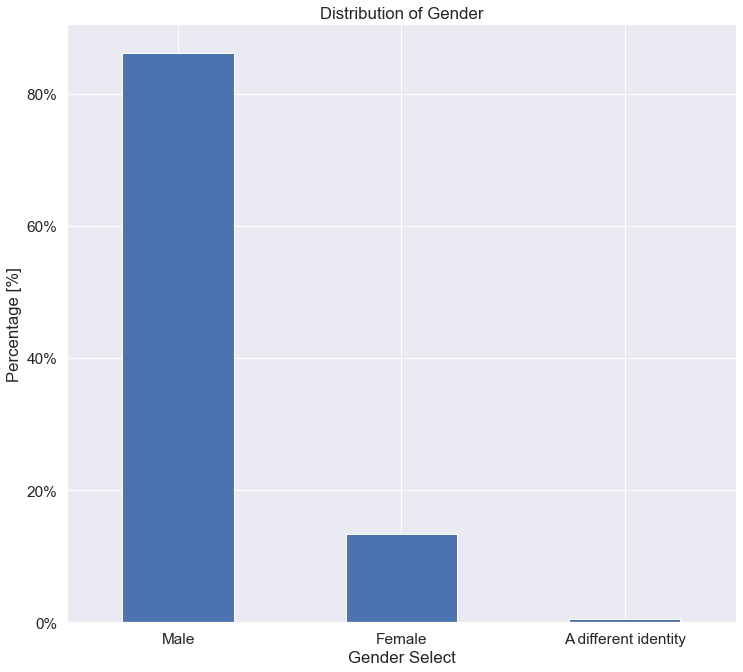

In [25]:
# value_counts() function is use to get a Series containing counts of unique values of GenderSelect.
# normalize=True is used to return the relative frequency by dividing all values by the sum of values.

import matplotlib.ticker as mtick

plt.figure(figsize=(12,8))
plt.title('Distribution of Gender')
plt.xlabel('Gender Select')
plt.ylabel('Percentage [%]')

df_demog_ds_genderpercentage=df_demog_ds['GenderSelect'].value_counts(normalize=True)*100
ax=df_demog_ds_genderpercentage.plot(kind='bar',figsize=(12,11),rot=0,align='center')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())     # Used for adding the '%' sign with labels in yaxis

#### 1.3.3 Country
<a id="country"></a>
The data scientists are working all over the world. The United States is regarded the largest data science community. India, China and some other countries are also having a fast growing recently. Is this true? Let's find out.

<div class="alert alert-block alert-info">

**Code**: 
Find the top 5 countries of data scientists.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.C** In your report's section '1.3.C', answer what are those top 5 countries and their corresponding number of data scienists
</div>
</div>

In [26]:
# value_counts() function is use to get a Series of records from df_demog_ds containing counts of unique values of Country
# head(5) is use to filter top 5 records and these are then stored in df_demog_ds_5country

df_demog_ds_5country=df_demog_ds['Country'].value_counts().head(5)
print("Top 5 Countries of Data Scientists    :  ")
df_demog_ds_5country

Top 5 Countries of Data Scientists    :  


United States     414
India             111
France             60
United Kingdom     55
Germany            50
Name: Country, dtype: int64

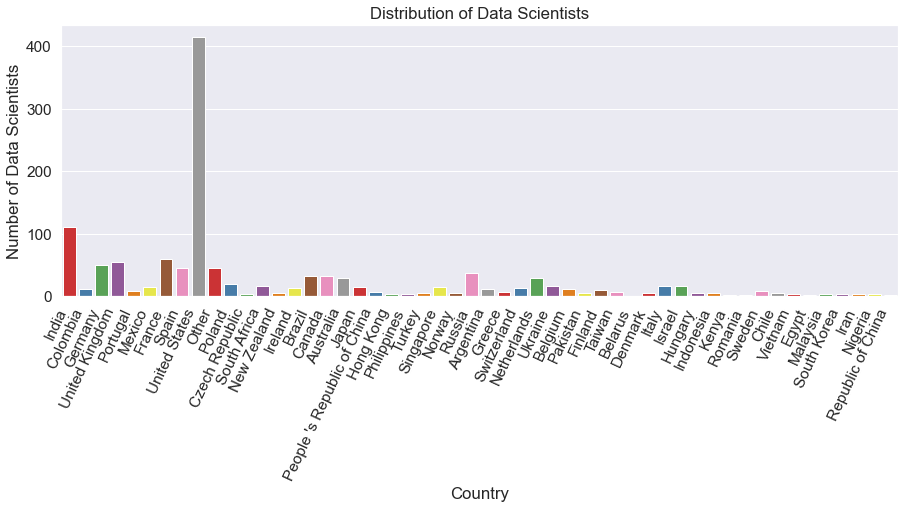

In [27]:
# Countplot is used to show distribution of data scientists across countries.

plt.figure(figsize=(15,5))
sns.countplot(data=df_demog_ds, x = 'Country',palette='Set1')     # palette used seaborn library for setting up colors in chart

plt.xticks(rotation=65, horizontalalignment='right')              # rotation is used to rotate x axis label to 65 degrees
plt.title('Distribution of Data Scientists')
plt.ylabel("Number of Data Scientists")
plt.show()

<div class="alert alert-block alert-info">

**Code**: 
Generate the distribution of top 5 countries of data scientists, using percentage barchart. You can not mannually input the name of top 5 countries (your code should not contain any name of the top 5 countries), and you are required to use python subset functions or many other functions.
    
<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.D** In your report's section '1.3.D', including the percentage barchart of those top 5 countries. Here the percentage is calculated based on all countries, not for those top 5 countries. So the sum of top 5 countries' percentage should be less than 1.
</div>
</div>

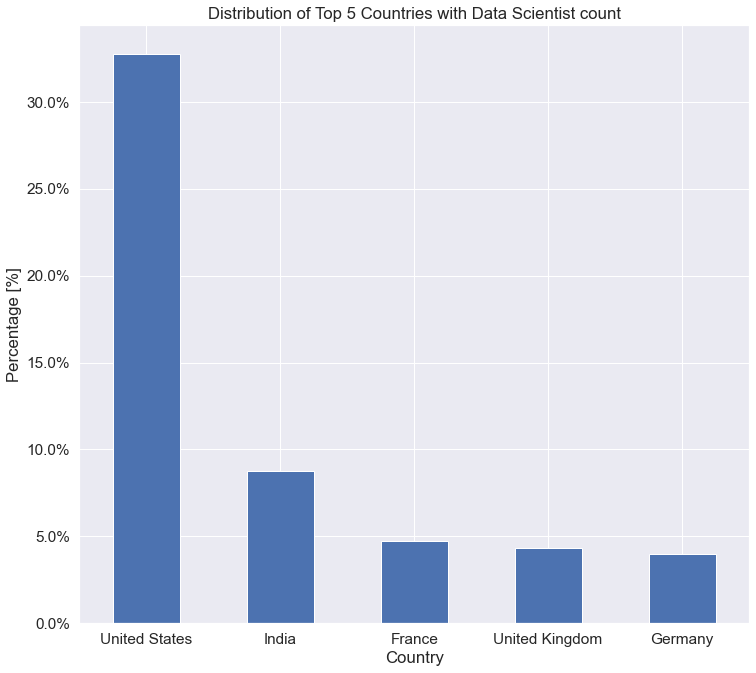

In [28]:
# value_counts() function is use to get a Series containing counts of unique values of Country
# normalize=True is used to convert the unique values of Country into percentage

df_demog_ds_per=df_demog_ds['Country'].value_counts(normalize=True)*100
df_country_top5=df_demog_ds_per.head(5)

plt.figure(figsize=(12,8))
plt.title('Distribution of Top 5 Countries with Data Scientist count')
plt.xlabel('Country')
plt.ylabel('Percentage [%]')
ax=df_country_top5.plot(kind='bar',figsize=(12,11),rot=0,align='center')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())     # Used for adding the '%' sign with labels in yaxis

Now we have some understanding about the country, let's see if there is any relationship between country, age and gender.

<div class="alert alert-block alert-info">

**Code**: 
You are required to output the mean and median age for each gender for the United States, India, Australia, Pakistan


<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.3.E** In your report's section '1.3.E', including the results of above coding task.
</div>
</div>




In [29]:
from IPython.display import Markdown, display                                       # Library to print output in bold.

df_demog_ds_Country=df_demog_ds[df_demog_ds['Country'].isin(['India'])]
df_demog_ds_mean=df_demog_ds_Country.groupby('GenderSelect').mean().round(2)        # To round mean upto 2 decimal places.
df_demog_ds_median=df_demog_ds_Country.groupby('GenderSelect').median().round(2)    # To round median upto 2 decimal places.

def printmd(string):
    display(Markdown(string))
printmd('**Mean age for India       :**')                                           # Printing string in bold format
print(df_demog_ds_mean['Age'])

def printmd(string):
    display(Markdown(string))
printmd('**Median age for India       :**')
print(df_demog_ds_median['Age'])

df_demog_ds_Country=df_demog_ds[df_demog_ds['Country'].isin(['United States'])]
df_demog_ds_mean=df_demog_ds_Country.groupby('GenderSelect').mean().round(2)
df_demog_ds_median=df_demog_ds_Country.groupby('GenderSelect').median().round(2)

def printmd(string):
    display(Markdown(string))
printmd('**Mean age for United States       :**')
print(df_demog_ds_mean['Age'])

def printmd(string):
    display(Markdown(string))
printmd('**Median age for United States       :**')
print(df_demog_ds_median['Age'])

df_demog_ds_Country=df_demog_ds[df_demog_ds['Country'].isin(['Australia'])]
df_demog_ds_mean=df_demog_ds_Country.groupby('GenderSelect').mean().round(2)
df_demog_ds_median=df_demog_ds_Country.groupby('GenderSelect').median().round(2)

def printmd(string):
    display(Markdown(string))
printmd('**Mean age for Australia       :**')
print(df_demog_ds_mean['Age'])

def printmd(string):
    display(Markdown(string))
printmd('**Median age for Australia       :**')
print(df_demog_ds_median['Age'])

df_demog_ds_Country=df_demog_ds[df_demog_ds['Country'].isin(['Pakistan'])]
df_demog_ds_mean=df_demog_ds_Country.groupby('GenderSelect').mean().round(2)
df_demog_ds_median=df_demog_ds_Country.groupby('GenderSelect').median().round(2)

def printmd(string):
    display(Markdown(string))
printmd('**Mean age for Pakistan       :**')
print(df_demog_ds_mean['Age'])

def printmd(string):
    display(Markdown(string))
printmd('**Median age for Pakistan       :**')
print(df_demog_ds_median['Age'])


**Mean age for India       :**

GenderSelect
Female    29.00
Male      30.02
Name: Age, dtype: float64


**Median age for India       :**

GenderSelect
Female    27
Male      28
Name: Age, dtype: int64


**Mean age for United States       :**

GenderSelect
A different identity    31.00
Female                  33.44
Male                    35.65
Name: Age, dtype: float64


**Median age for United States       :**

GenderSelect
A different identity    31
Female                  31
Male                    33
Name: Age, dtype: int64


**Mean age for Australia       :**

GenderSelect
Female    32.6
Male      35.0
Name: Age, dtype: float64


**Median age for Australia       :**

GenderSelect
Female    31
Male      34
Name: Age, dtype: int64


**Mean age for Pakistan       :**

GenderSelect
Male    32
Name: Age, dtype: int64


**Median age for Pakistan       :**

GenderSelect
Male    27
Name: Age, dtype: int64


## Part 2 - Data Science Job Advertising Data

In this part, you are required to use the text processing skills to find out the insights in data science job adverising Data.

### 2.1. Load the data and Extract the high frequency words
<a id="text"></a>

Firstly, you will need to load the [JobPostings.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/JobPostings.csv) data and sub-set out of the job description from it.

In [30]:
!pip install nltk
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.classify import SklearnClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHUBHNEET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df_text = pd.read_csv('JobPostings.csv')
df_text

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


<div class="alert alert-block alert-info">

**Code**: 
You are required to extract the token and append them into the list 'token'.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.A** In your report's section '2.1.A', including your code of this task. You can copy and paster your completed code in the following cell
</div>
</div>


In [32]:
lower = []
for item in df_text['job_description']:
    lower.append(item.lower())           # lowercase description

# Tokens are extracted from job_description and saved into list 'token' 

token = []
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
token = tokenizer.tokenize(str(lower))
token

['read',
 'what',
 'people',
 'are',
 'saying',
 'about',
 'working',
 'here',
 'n',
 'nwe',
 'are',
 'farmers',
 'n',
 'njoin',
 'a',
 'team',
 'of',
 'diverse',
 'professionals',
 'at',
 'farmers',
 'to',
 'acquire',
 'skills',
 'on',
 'the',
 'job',
 'and',
 'apply',
 'your',
 'learned',
 'knowledge',
 'to',
 'future',
 'roles',
 'at',
 'farmers',
 'farmers',
 'insurance',
 'also',
 'offers',
 'extensive',
 'training',
 'opportunities',
 'through',
 'the',
 'award',
 'winning',
 'university',
 'of',
 'farmers',
 'named',
 'by',
 'training',
 'magazine',
 'amongst',
 'top',
 '10',
 'corporate',
 'training',
 'units',
 'in',
 'the',
 'world',
 'start',
 'your',
 'career',
 'at',
 'farmers',
 'today',
 'n',
 'njob',
 'summary',
 'n',
 'nthe',
 'enterprise',
 'data',
 'scientist',
 'i',
 'will',
 'be',
 'a',
 'valuable',
 'part',
 'of',
 'the',
 'data',
 'science',
 'team',
 'who',
 'provide',
 'statistical',
 'analysis',
 'modeling',
 'and',
 'vis',
 'ualization',
 'services',
 'for',


Secondly, 

<div class="alert alert-block alert-info">

**Code**: 
You are required to find out the words freqency which is more than 6000 in the job descriptions. (Please use stopwords at beginning)


<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.B** In your report's section '2.1.B', list those words with frequency > 6000.
</div>
</div>




In [33]:
stop_words = set(stopwords.words('english')) 

# Code to eliminate stopwords from 'token'
filtered_tokens = [i for i in token if i not in stop_words]

freqd = []
freqd=FreqDist(filtered_tokens)
freqd

FreqDist({'n': 278687, 'data': 122297, 'experience': 45880, 'business': 33232, 'learning': 26814, 'science': 26678, 'work': 25213, 'r': 23313, 'analytics': 21674, 'team': 20573, ...})

In [34]:
# Code to show the words whose frequency is more than 6000

highfreq=[]
top=freqd.most_common()
for key, value in top:
  if value > 6000:
         highfreq.append(key)
highfreq

['n',
 'data',
 'experience',
 'business',
 'learning',
 'science',
 'work',
 'r',
 'analytics',
 'team',
 'analysis',
 'machine',
 'skills',
 'xa0',
 'models',
 'scientist',
 'years',
 'solutions',
 'statistical',
 'nexperience',
 'tools',
 'new',
 'development',
 'using',
 'working',
 'information',
 'python',
 'research',
 'techniques',
 'knowledge',
 'degree',
 'modeling',
 'including',
 'ability',
 'technical',
 'statistics',
 'engineering',
 'management',
 'advanced',
 'computer',
 'required',
 'opportunity',
 'related',
 'develop',
 'problems',
 'algorithms',
 'complex',
 'insights',
 'support',
 'analytical',
 'company',
 'environment',
 'systems',
 'position',
 'technology',
 'status',
 'etc',
 'software',
 'predictive',
 'product',
 'sql',
 'services',
 'teams',
 'projects',
 'job',
 'design',
 'people',
 'large',
 'help',
 'field',
 'requirements',
 'strong',
 'across',
 'methods',
 'role',
 'build',
 'us',
 'products',
 'customer',
 'use',
 'e',
 'employment',
 'big',
 'tim

Then,

<div class="alert alert-block alert-info">

**Code**: 
You are required to sort and display the top 10 high frequency words in 'freq6000'

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.C** In your report's section '2.1.C', list those top 10 words
</div>
</div>






In [35]:
# Code to sort and display the top 10 high fequency words in 'freq6000'

freq6000=freqd.most_common(10)
def sortSecond(freq6000): 
    return freq6000[1]  
freq6000.sort(key = sortSecond, reverse=True)
freq6000

[('n', 278687),
 ('data', 122297),
 ('experience', 45880),
 ('business', 33232),
 ('learning', 26814),
 ('science', 26678),
 ('work', 25213),
 ('r', 23313),
 ('analytics', 21674),
 ('team', 20573)]

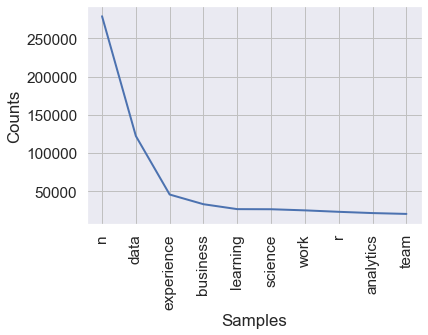

In [36]:
# Plotting the graph of top 10 high frequency words.
fig=freqd.plot(10, cumulative=False)

Finally,

<div class="alert alert-block alert-info">

**Code**: 
You are required to carry out one more analytics on this data set, and implement it below.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1.D** In your report's section '2.1.D', describe your self-defined text analysis task, and the discovery from your analysis.
</div>
</div>







<div class="alert alert-block alert-info">

**TASK :**
 Help Data Scientist job seeker stand out and find relevant job in their area. Using current data, determine what all information might be useful for them? 
   
<div class="alert alert-block alert-warning">
    
**Report**: 
     <ol>
     <li> Plot and display top high demand skillset required for Data Scientist? </li>
     <li> Identify top job seeker websites or platform where job advertisements are listed. </li>
    </ol>
</div>

</div>

In [37]:
# PART - 1
# Determine the frequencies of skillset listed in job description.

technology = ['python', 'r', 'matlab', 'scala', 'sql', 'spark', 'hadoop', 'java', 'c', 'hive', 'gurobi', 'mysql', 'unix',
              'linux', 'solaris', 'powerbi', 'qlikView', 'tableau', 'bigquery', 'spss', 'c#', 'perl', 'javascript',
              'saas', 'nosql', 'mongodb', 'cassandra', 'xml', 'jquery', 'django', 'angular']

tech_words = [i for i in token if i in technology]

freqd_skill = []
freqd_skill=FreqDist(tech_words)
top_skill=freqd_skill.most_common()
top_skill

[('r', 23313),
 ('python', 11772),
 ('sql', 7884),
 ('spark', 4042),
 ('hadoop', 3782),
 ('java', 2902),
 ('c', 2881),
 ('tableau', 2677),
 ('scala', 1867),
 ('hive', 1822),
 ('matlab', 1162),
 ('nosql', 1005),
 ('linux', 977),
 ('spss', 669),
 ('unix', 554),
 ('javascript', 470),
 ('mysql', 464),
 ('perl', 441),
 ('mongodb', 306),
 ('cassandra', 301),
 ('saas', 281),
 ('powerbi', 253),
 ('gurobi', 183),
 ('xml', 175),
 ('bigquery', 107),
 ('django', 67),
 ('angular', 42),
 ('jquery', 23),
 ('solaris', 12)]

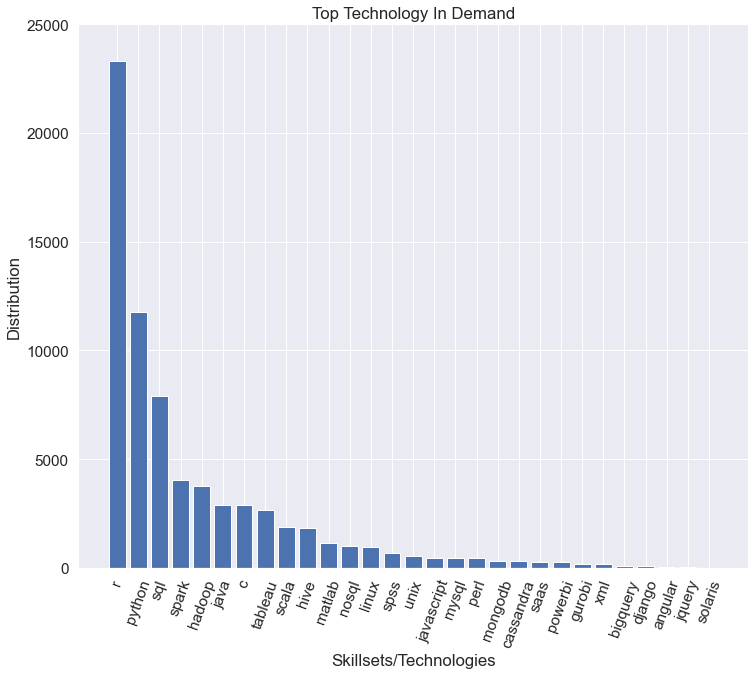

In [38]:
# Plot bar chart for top high demand skillsets.

plt.bar(range(len(top_skill)), [val[1] for val in top_skill], align='center')
plt.xticks(range(len(top_skill)), [val[0] for val in top_skill])
plt.xticks(rotation=70)     # Rotate xaxis label to 70 degrees
fig = plt.gcf()
fig.set_size_inches(12, 10) # To set size of figure
plt.ylim(0, 25000)          # To set yaxis limit
plt.ylabel('Distribution')  
plt.xlabel('Skillsets/Technologies')

plt.title('Top Technology In Demand')
plt.show()


In [39]:
# PART - 2

# URLs converted into lowercase
lower_url = []
for item in df_text['url']:
    lower_url.append(item.lower())           

# Tokens are extracted from url and saved into 'token_urls'
token_urls = []
tokenizer = RegexpTokenizer(r"\w+(?:\.\w+)+(?:\w)+")
token_urls = tokenizer.tokenize(str(lower_url))

# Code to sort and display the urls list and their frequencies
freqd_url = []
freqd_url=FreqDist(token_urls)
url_dist=freqd_url.most_common()
def sortSecond(url_dist): 
    return url_dist[1]  
url_dist.sort(key = sortSecond, reverse=True)
url_dist

[('www.indeed.com', 4955),
 ('www.careerbuilder.com', 2033),
 ('openings.monster.com', 1861),
 ('www.theladders.com', 578),
 ('www.dice.com', 445),
 ('stackoverflow.com', 76),
 ('www.higheredjobs.com', 43),
 ('details.cfm', 43),
 ('openings.monster.co.uk', 3),
 ('www.totaljobs.com', 2),
 ('www.simplyhired.com', 2),
 ('orpine.com', 1),
 ('banen.monsterboard.nl', 1),
 ('www.monsterindia.com', 1),
 ('23510331.html', 1)]

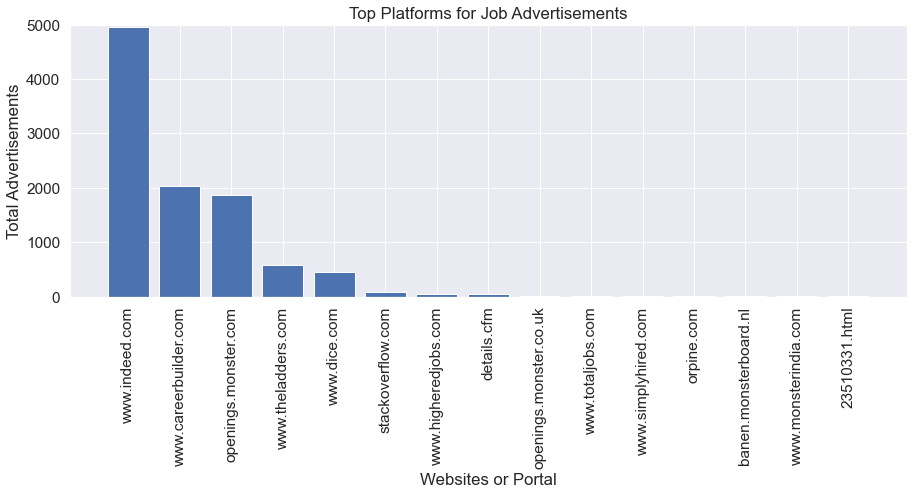

In [40]:
# Plot bar chart to display top job seeker websites/platform.

plt.bar(range(len(url_dist)), [val[1] for val in url_dist], align='center')
plt.xticks(range(len(url_dist)), [val[0] for val in url_dist])
plt.xticks(rotation=90)
fig = plt.gcf()

fig.set_size_inches(15, 5) # to set size of figure
plt.ylim(0, 5000) # to set yaxis limit
plt.ylabel('Total Advertisements')
plt.xlabel('Websites or Portal')

plt.title('Top Platforms for Job Advertisements')
plt.show()


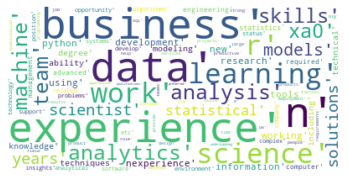

In [41]:
# Additional Findings
# Reference: https://www.datacamp.com/community/tutorials/wordcloud-python

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(highfreq))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()